In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PolarSi import *
import matplotlib


In [2]:
FITs_file = 'FITS_files/Optical/Halp_rsubt_L328_323_331.fits'
data  = FITS(FITs_file)
data.generate_RA_DEC_mesh()
print('optical file')
print('bottom left corner',np.amax(data.RA_grid),np.amin(data.DEC_grid))
print('top right corner',np.amin(data.RA_grid),np.amax(data.DEC_grid))


optical file
bottom left corner 274.4131759592302 -18.45936668420353
top right corner 273.66390737416975 -17.70985553801647


In [3]:
plank_data = data.data
bottom_xy_L328 = [400,700]
top_xy_L328 = [1700,2700]

bottom_xy_L323 = [2100,450]
top_xy_L323 = [3700,2250]

bottom_xy_L331 = [490,2500]
top_xy_L331 = [1600,3400]

L328_image = slicing(bottom_xy_L328,top_xy_L328,plank_data)
L328_RA_grid = slicing(bottom_xy_L328,top_xy_L328,data.RA_grid)
L328_DEC_grid = slicing(bottom_xy_L328,top_xy_L328,data.DEC_grid)

lower_res_image,_ = bining_avg(L328_image,5)
lower_res_RA,_ = bining_avg(L328_RA_grid,5)
lower_res_DEC,_ = bining_avg(L328_DEC_grid,5)

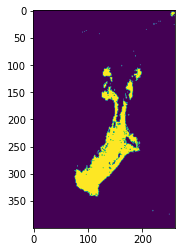

In [5]:
lower_res_image = lower_res_image
lower_res_image_mod = (lower_res_image<2000)
lower_res_image_mod = (0<lower_res_image)*lower_res_image_mod*50
plt.imshow(lower_res_image_mod)
plt.show()


In [6]:
matplotlib.image.imsave('L328_low_res.png', lower_res_image_mod)

In [7]:
a,b,c,d = Gaussian_derivative('HRO_images/L328_low_res.png',25,1)

/home/siddharth/Documents/Polarimetry/main project/PolarSi.py:351: RuntimeWarning: divide by zero encountered in ubyte_scalars
  return (180/np.pi)*np.arctan(x/y)


In [86]:
optical_polarization_data = pd.read_csv('data_gaia_added/L328_pol_full_mod2.csv', delimiter=',')
optical_ra = np.array(optical_polarization_data['ra'])
optical_dec = np.array(optical_polarization_data['dec'])
optical_pa = np.array(optical_polarization_data['PA'])
optical_pa_mod = optical_pa -180*(optical_pa>125)*np.ones_like(optical_pa)+360

tol = abs(lower_res_DEC[1,0]-lower_res_DEC[0,0])*2

optical_polarization_data_map = mapping_func(lower_res_RA,lower_res_DEC,optical_ra,optical_dec,optical_pa_mod,tol)
mask_polarization_map = (optical_polarization_data_map>0)
mask_gradient = (c>0)
not_mask_polarization_map = (mask_polarization_map==0)
not_mask_gradient = (c==0)

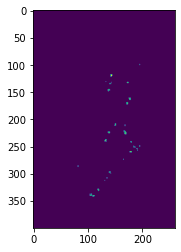

In [87]:
plt.imshow(optical_polarization_data_map*mask_gradient)
plt.show()


In [88]:
relative_orientation = (d*mask_polarization_map - optical_polarization_data_map*mask_gradient + (not_mask_polarization_map+not_mask_gradient)*(-720))
  

In [89]:
l = (relative_orientation[-360<relative_orientation] +360)



(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  6., 19.,  7., 18.,  9., 15., 22., 11.,
        33.,  3.,  5.,  7.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-180, -170, -160, -150, -140, -130, -120, -110, -100,  -90,  -80,
         -70,  -60,  -50,  -40,  -30,  -20,  -10,    0,   10,   20,   30,
          40,   50,   60,   70,   80,   90,  100,  110,  120,  130,  140,
         150,  160,  170,  180,  190,  200,  210]),
 [<matplotlib.patches.Polygon at 0x7f42a8096070>])

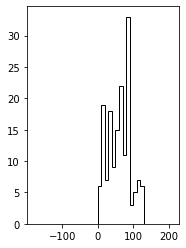

In [90]:
bins_array = np.arange(-180,220,10)
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.hist(l, bins_array ,color='k',histtype = 'step')

In [ ]:
# fig = plt.figure()
# ax1 = fig.add_subplot(131)
# ax1.imshow(L328_image,origin='lower')
# ax2 = fig.add_subplot(132)
# ax2.imshow(d,origin='lower')
# ax3 = fig.add_subplot(133)
# ax3.imshow(optical_polarization_data_map,origin='lower')
# # ax3.imshow(c,origin='lower')
# plt.show()